# 📊 Анализ Полос Боллинджера для акций Сбербанка

## 🔹 Этап 1: Импорт библиотек

**Пояснение:**  
Загружаем необходимые библиотеки: <u>pandas</u> и <u>numpy</u> для работы с данными, <u>plotly.graph_objects</u> для визуализации.

In [13]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go

##  🔹 Этап 2: Загрузка данных

**Пояснение:**  
Читаем CSV-файл с данными о котировках акций Сбербанка. Используем <u>sep=';'</u>, так как данные разделены точкой с запятой. Столбец <u>DATE</u> сразу преобразуется в формат даты.

In [15]:
# load data
file_path = 'SBER.csv'

# format data on correct
data = pd.read_csv(file_path, sep=';', parse_dates=['DATE'])
data

,DATE,OPEN,HIGH,LOW,CLOSE,VOL
0,2013-01-08,96.50,98.50,96.12,98.37,92329970
1,2013-01-09,98.41,98.65,97.81,98.23,59776760
2,2013-01-10,98.35,98.55,97.96,98.41,47627940
3,2013-01-11,98.80,99.76,98.48,99.56,71837780
4,2013-01-14,99.72,101.27,99.57,100.99,83853170
...,...,...,...,...,...,...
2713,2023-11-06,269.00,273.87,268.62,273.42,29231770
2714,2023-11-07,273.08,274.78,272.20,273.31,32183320
2715,2023-11-08,273.53,278.35,273.28,278.15,58000060
2716,2023-11-09,278.60,278.85,276.02,276.65,28258660


## 🔹 Этап 3: Подготовка временного ряда

**Пояснение:**  
Уточняем формат даты, чтобы избежать предупреждений и обеспечить совместимость с графиками.

In [120]:
data['DATE'] = np.array(pd.to_datetime(data['DATE'].astype(str)))
data

,DATE,OPEN,HIGH,LOW,CLOSE,VOL
0,2013-01-08,96.50,98.50,96.12,98.37,92329970
1,2013-01-09,98.41,98.65,97.81,98.23,59776760
2,2013-01-10,98.35,98.55,97.96,98.41,47627940
3,2013-01-11,98.80,99.76,98.48,99.56,71837780
4,2013-01-14,99.72,101.27,99.57,100.99,83853170
...,...,...,...,...,...,...
2713,2023-11-06,269.00,273.87,268.62,273.42,29231770
2714,2023-11-07,273.08,274.78,272.20,273.31,32183320
2715,2023-11-08,273.53,278.35,273.28,278.15,58000060
2716,2023-11-09,278.60,278.85,276.02,276.65,28258660


## 🔹 Этап 4: Расчет полос Боллинджера

**Пояснение:**  
Вычисляем 20-дневную простую скользящую среднюю и верхнюю/нижнюю полосы Боллинджера на основе стандартного отклонения. Это помогает визуализировать волатильность и возможные точки входа/выхода на рынке.

In [122]:
# setup settings
ma_size = 20  # age SMA
bol_size = 2  # width screen 'hall'

# calculate BB
data['SMA'] = data['CLOSE'].rolling(ma_size).mean()
data['BB_UP'] = data['SMA'] + data['CLOSE'].rolling(ma_size).std() * bol_size
data['BB_DOWN'] = data['SMA'] - data['CLOSE'].rolling(ma_size).std() * bol_size
data

,DATE,OPEN,HIGH,LOW,CLOSE,VOL,SMA,BB_UP,BB_DOWN
0,2013-01-08,96.50,98.50,96.12,98.37,92329970,NaN,NaN,NaN
1,2013-01-09,98.41,98.65,97.81,98.23,59776760,NaN,NaN,NaN
2,2013-01-10,98.35,98.55,97.96,98.41,47627940,NaN,NaN,NaN
3,2013-01-11,98.80,99.76,98.48,99.56,71837780,NaN,NaN,NaN
4,2013-01-14,99.72,101.27,99.57,100.99,83853170,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2713,2023-11-06,269.00,273.87,268.62,273.42,29231770,268.4680,275.166831,261.769169
2714,2023-11-07,273.08,274.78,272.20,273.31,32183320,268.9835,275.494774,262.472226
2715,2023-11-08,273.53,278.35,273.28,278.15,58000060,269.8805,276.243923,263.517077
2716,2023-11-09,278.60,278.85,276.02,276.65,28258660,270.4880,277.006600,263.969400


## 🔹 Этап 5: Визуализация данных

**Пояснение:**  
Создаем интерактивный график с использованием библиотеки Plotly. Визуализируем цену закрытия, скользящую среднюю и полосы Боллинджера. Это помогает выявить рыночные тренды и зоны перекупленности/перепроданности.

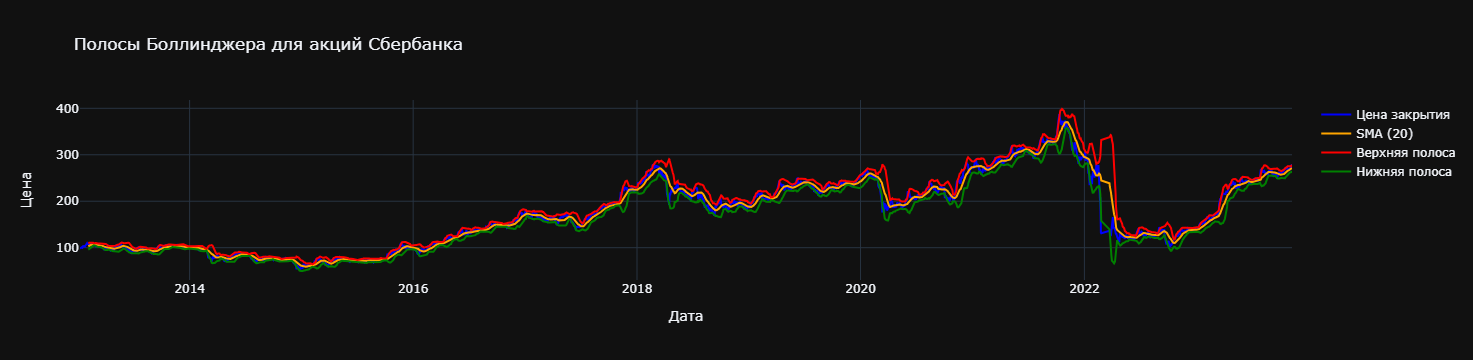

In [124]:
# create chart
fig = go.Figure()
fig.add_trace(go.Scatter(x=data['DATE'].tolist(), y=data['CLOSE'], mode='lines', name='Цена закрытия', line=dict(color='blue')))
fig.add_trace(go.Scatter(x=data['DATE'].tolist(), y=data['SMA'], mode='lines', name='SMA (20)', line=dict(color='orange')))
fig.add_trace(go.Scatter(x=data['DATE'].tolist(), y=data['BB_UP'], mode='lines', name='Верхняя полоса', line=dict(color='red')))
fig.add_trace(go.Scatter(x=data['DATE'].tolist(), y=data['BB_DOWN'], mode='lines', name='Нижняя полоса', line=dict(color='green')))

# setup chart
fig.update_layout(title='Полосы Боллинджера для акций Сбербанка', xaxis_title='Дата', yaxis_title='Цена', template='plotly_dark')

fig.show()

## 🧠 Заключение

Использование полос Боллинджера позволяет трейдерам и аналитикам визуально оценивать состояние рынка. В нашем примере мы построили индикатор на основе исторических данных Сбербанка, выявили уровни поддержки/сопротивления и подготовили основу для возможной стратегии входа в рынок.